In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import deepjets.models as djm
import deepjets.learning as djl
import numpy as np
from keras.optimizers import Adam

Using Theano backend.


In [3]:
n_images = 2000
n_folds = 2
test_frac = 0.1
val_frac = 0.1
sig_file = 'images/w_shrink_1p2.h5'
bkd_file = 'images/qcd_shrink_1p2.h5'
dataset_name = 'datasets/shrink_1p2'
model_name = 'models/maxout_shrink_1p2'

In [4]:
h5_files = djl.prepare_datasets(
    sig_file, bkd_file, dataset_name,
    n_sig=n_images, n_bkd=n_images, test_frac=test_frac, val_frac=val_frac,
    n_folds=n_folds, shuffle=True, shuffle_seed=1)

In [5]:
gs_results, gs_new_results = djl.optimizer_grid_search(
    djm.get_maxout, (25**2,), Adam, {'lr' : [0.001, 0.002]},
    h5_files['train'], model_name=model_name, verbose=2, max_jobs=2)

Compiling models...

Initialising cross-validation...

Optimizer parameters = {'lr': 0.001}, k-fold = 0
Optimizer parameters = {'lr': 0.001}, k-fold = 1
Training on 1620 samples, validating on 180 samples.
Datasets from datasets/shrink_1p2_train_kf0.h5.Training on 1620 samples, validating on 180 samples.
Datasets from datasets/shrink_1p2_train_kf1.h5.


Patience tolerance reached.
Patience tolerance reached.

Training complete. Best AUC = 13.8807176436
Training complete. Best AUC = 11.6811346717


Testing on 1800 samples.
Dataset from datasets/shrink_1p2_train_kf0.h5.Testing on 1800 samples.
Dataset from datasets/shrink_1p2_train_kf1.h5.





Optimizer parameters = {'lr': 0.002}, k-fold = 0
Optimizer parameters = {'lr': 0.002}, k-fold = 1
Training on 1620 samples, validating on 180 samples.
Datasets from datasets/shrink_1p2_train_kf0.h5.Training on 1620 samples, validating on 180 samples.
Datasets from datasets/shrink_1p2_train_kf1.h5.


Patience tolerance reached.
Patience tolerance r

Testing on 400 samples.
Dataset from datasets/shrink_1p2_test.h5.
Score    = 0.556465821266
AUC      = 10.6004241709
Accuracy = 290/400 = 0.725



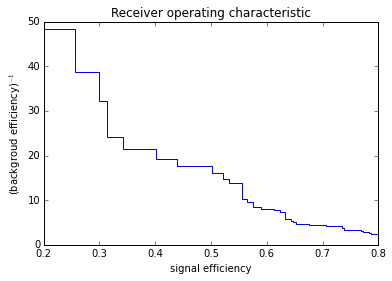

In [6]:
_ = djl.test_model(djm.load_model('models/maxout_shrink_1p2_gp1_kf0'), h5_files['test'])

In [7]:
gs_results

[{'igp': 0,
  'ikf': 0,
  'parameters': {'lr': 0.001},
  'results': {'AUC': 10.64555886824491,
   'accuracy': 0.71,
   'score': 0.58134057362874347}},
 {'igp': 0,
  'ikf': 1,
  'parameters': {'lr': 0.001},
  'results': {'AUC': 14.217114429627214,
   'accuracy': 0.705,
   'score': 0.57444962713453507}},
 {'igp': 1,
  'ikf': 0,
  'parameters': {'lr': 0.002},
  'results': {'AUC': 8.2003299555018359,
   'accuracy': 0.7172222222222222,
   'score': 0.57153622706731155}},
 {'igp': 1,
  'ikf': 1,
  'parameters': {'lr': 0.002},
  'results': {'AUC': 14.317574520893881,
   'accuracy': 0.7322222222222222,
   'score': 0.56547613779703776}}]

In [8]:
gs_new_results

[{'parameters': {'lr': 0.001},
  'results': {'AUC': array([ 10.64555887,  14.21711443]),
   'accuracy': array([ 0.71 ,  0.705]),
   'score': array([ 0.58134057,  0.57444963])}},
 {'parameters': {'lr': 0.002},
  'results': {'AUC': array([  8.20032996,  14.31757452]),
   'accuracy': array([ 0.71722222,  0.73222222]),
   'score': array([ 0.57153623,  0.56547614])}}]